<a href="https://colab.research.google.com/github/min02choi/Machine-Learning/blob/main/Chapter1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mnist, keras, nn

## 텐서플로 2.0 시작하기: 초보자용
두잇!딥러닝 Ch1실습 01 (p.89)


## TensorFlow 설정하기

In [20]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.9.2


## Dataset 로드하기
MNIST 데이터세트 로드

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0         # 샘플 데이터를 정수에서 부동 소숫점 숫자로 변환

11490434/11490434 [==============================] - 0s 0us/step


## 머신러닝 모델 빌드하기
층을 차례대로 쌓아 tf.keras.Sequential 모델을 만듦

In [4]:
# 모델 생성
model = tf.keras.models.Sequential([                # keras의 기본 모델 구조(층을 차례대로 쌓음)
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),  # 68개의 유닛을 가진 층을 추가
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax") # 10개의 출력유닛을 가진 소프트맥스 층 추가
])

* activation: 층의 활성화 함수 설정

In [5]:
# 컴파일 메서드 -> 학습 과정 설정
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

.compile(세개의 핵심 매개변수 + a)
* optimizer: 훈련 과정 설정
* loss: 최적화 과정에서 최소화될 손실 함수(loss function)를 설정
* metrics: 훈련을 모니터링하기 위해 사용

* (추가)모델의 훈련과 평가를 즉시 실행하려면 run_eagerly=True 매개변수 전달

In [6]:
preditions = model(x_train[:1]).numpy() # 각 클래스에 대한 스코어 벡터 반환
preditions      

array([[0.11837799, 0.10229676, 0.12215265, 0.11623695, 0.1287358 ,
        0.0839152 , 0.0544358 , 0.10568233, 0.08228636, 0.08588024]],
      dtype=float32)

로짓(logits) 또는 (log-odds)스코어 벡터로 반환
* 로짓 함수: (쉽게 말해) 시그모이드 함수의 역함수

In [7]:
tf.nn.softmax(preditions).numpy()   # 로짓을 각 클래스에 대한 확률로 변환

array([[0.10183045, 0.10020598, 0.10221554, 0.10161265, 0.10289066,
        0.09838086, 0.09552298, 0.10054581, 0.09822075, 0.09857438]],
      dtype=float32)

In [8]:
# 손실 함수 정의 -> 찾아볼 것
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # 각 예시에 대해 스칼라 손실 반환

In [9]:
loss_fn(y_train[:1], preditions).numpy()    # 훈련되지 않은 모델의 초기 손실

2.318909

해당 모델은 훈련되지 않았기 때문에 무작위에 가까운확률 제공(총 클래스 개수 10개 -> 각 클래스당 확률 1/10)

실제 클래스의 음의 로그 확률
tf.math.log(1/10) ~= 2.3

모델이 훈련되어 올바른 클래스를 확신하는 경우 손실: 0

In [10]:
# model.compile(optimizer='adam', loss=loss_fn, matrics=["accuracy"]) ?

# 훈련 시작 전 모델을 구성하고 컴파일
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## 모델 훈련 및 평가하기

In [11]:
# 만든 모델을 학습(fit() 함수)
hist = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.9148
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1422 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1035 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0871 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0720 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0622 - accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0560 - accuracy: 0.9816
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0512 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0467 - accuracy: 0.9844
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0424 - accurac

model.fit(x, y, batch_size=32, epochs=10)
* x: 입력 데이터
* y: 라벨 값
* batch_size:몇 개의 샘플로 가중치를 갱신
* epochs: 학습 반복 횟수

In [12]:
# 모델 성능 확인
model.evaluate(x_train, y_train, verbose=2)

1875/1875 - 2s - loss: 0.0185 - accuracy: 0.9941 - 2s/epoch - 870us/step


[0.01846342906355858, 0.9941333532333374]

model.evauate

모델의 최종적인 정답률과 loss값을 반환
* 0 번째 인덱스: loss
* 1 번째 인덱스: 정답률

In [13]:
# 모델이 확률을 반환
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

probability_model(x_test[:5])   # 무슨 의미일까

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533698, 0.08533698, 0.08533698, 0.08533817, 0.08533698,
        0.08533698, 0.08533698, 0.23196542, 0.08533698, 0.08533748],
       [0.08533702, 0.08533888, 0.2319649 , 0.08533707, 0.08533702,
        0.08533702, 0.08533702, 0.08533702, 0.08533702, 0.08533702],
       [0.08533861, 0.2319397 , 0.08533902, 0.08533865, 0.0853395 ,
        0.08533869, 0.08533905, 0.08534224, 0.08534589, 0.08533861],
       [0.23191473, 0.0853402 , 0.08536287, 0.0853402 , 0.0853402 ,
        0.08534023, 0.08534076, 0.08534021, 0.0853402 , 0.08534048],
       [0.08533717, 0.08533717, 0.0853373 , 0.08533717, 0.23196256,
        0.08533717, 0.08533717, 0.08533764, 0.08533717, 0.08533948]],
      dtype=float32)>

## (번외) Matplotlib을 통해 시각적으로 확인

In [14]:
import matplotlib.pyplot as plt

# 위의 모델의 epochs 개수에 따라 개수 나옴
print(hist.history["loss"])       # 오차
print(hist.history["accuracy"])   # 정확도
# print(hist.history["val_loss"])       # 오차
# print(hist.history["accuracy"])   # 정확도

[0.2952362596988678, 0.14218749105930328, 0.10348168015480042, 0.08713308721780777, 0.07200857251882553, 0.06220249459147453, 0.055989596992731094, 0.051238927990198135, 0.04669428616762161, 0.04236298054456711]
[0.9147833585739136, 0.9565500020980835, 0.9687833189964294, 0.9733333587646484, 0.9773333072662354, 0.9801999926567078, 0.9816333055496216, 0.9833999872207642, 0.9843999743461609, 0.9858166575431824]


fit()함수의 리턴으로 히스토리 객체를 얻을 수 있음
* loss, accuraccy

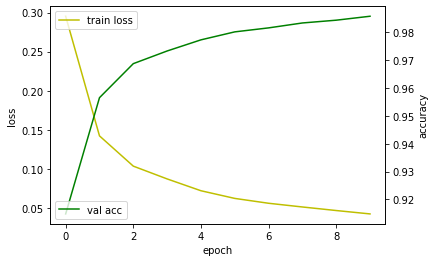

In [15]:
fig, loss_ax = plt.subplots()   # 여러 개의 그래프를 한번에 동시에 그려줌
acc_ax = loss_ax.twinx()        # 하나의 그래프에 모두 표현(x축만 공유)

loss_ax.plot(hist.history["loss"], "y", label="train loss")
acc_ax.plot(hist.history["accuracy"], "g", label="val acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

plt.show()

(<Figure size 432x288 with 6 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb50f1f4490>,
      dtype=object))
Figure(432x288)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb50f1f4490>


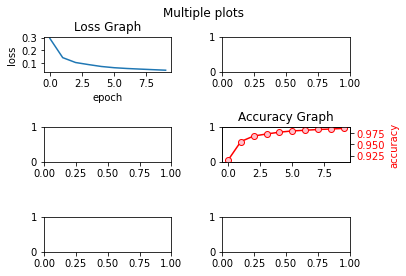

In [16]:
# Matplotlib 연습
sub_plots = plt.subplots(3, 2)

print(sub_plots)        # 튜플 형태

# 객체(튜플 분리)
fig = sub_plots[0]      # figure에 대한 정보
graph = sub_plots[1]    # graph에 대한 정보

print(fig)
print(graph)

# 오차 그래프 그리기
loss_gph = graph[0][0]    # 그래프를 인덱싱하여 어디에 그릴지 지정
loss_gph.plot(hist.history["loss"])
loss_gph.set_title("Loss Graph")
loss_gph.set_xlabel("epoch")
loss_gph.set_ylabel("loss")

# 정확도 그래프 그리가
acc_gph = graph[1][1].twinx()   # y축을 오른쪽에 그림
acc_gph.plot(hist.history["accuracy"],
             color="red",
             marker="o", markerfacecolor="pink", markersize=6)
acc_gph.set_title("Accuracy Graph")
acc_gph.set_xlabel("epoch")
acc_gph.set_ylabel("accuracy", color="red")   # color 생략 가능

acc_gph.tick_params(axis="y", labelcolor="red") # 축의 색 수정 (axis의 값으로는 x/y)


# 좌표평면 view 수정
fig.suptitle("Multiple plots")    # 좌표평면 전체 제목 지정
fig.tight_layout(pad=2)

plt.show()      # 이거 왜하는거임

subplots(3, 2)의 반환값(객체) => 두 개의 값을 가진 튜플
* 인덱스 0(sub_plots[0]): figure의 모양(size, axes 개수)
* 인덱스 1(sub_plots[1]): 좌표평면에 대한 정보

subplot / subplots의 차이
* subplot: 그래프의 배치와 어디에 그릴지 지정해 주어야 함(매개변수 3개)
* subplots: 그래프의 배치만 지정해 주면 됨

twinx: x축을 공유(y축이 두개)

twiny: y축을 공유(x축이 두개)

In [19]:
# 학습 결과 저장하기
# model.load_weights("doit-chapter1")

In [17]:
# 좌표평면 수정... 인데 왜 화면에 안보여짐?
fig.suptitle("Multiple plots")    # 좌표평면 전체 제목 지정
fig.tight_layout(pad=2)           # 자표평면 사이의 거리
plt.show()